<a href="https://colab.research.google.com/github/egyvedriyanto78/Deep-Learning/blob/main/ColorDetectionYOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Detection with YOLOv8

- Egy Vedriyanto ( 2117051035 )

In [1]:
# Install YOLOv8 dan library pendukung
!pip install ultralytics roboflow opencv-python-headless matplotlib

# Import library yang diperlukan
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
# Hubungkan ke akun Roboflow dan unduh dataset
rf = Roboflow(api_key="Mxh8oI7MmqpEUdNgQbK6")  # Masukkan API key Anda
project = rf.workspace("starling").project("color-palette")  # Workspace dan Project
version = project.version(6)  # Versi dataset
dataset = version.download("yolov8")  # Format dataset untuk YOLOv8

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to color-palette-6 in yolov8:: 100%|██████████| 2278/2278 [00:00<00:00, 3032.90it/s]


In [3]:
# Tampilkan beberapa file dari folder dataset
dataset_path = dataset.location
print("Dataset path:", dataset_path)

# Tampilkan beberapa file dalam folder train
train_images = os.listdir(os.path.join(dataset_path, "train", "images"))
print("Sample train images:", train_images[:5])

Dataset path: /content/color-palette-6
Sample train images: ['IMG_3848_png.rf.08780f295e1a5691806009d092bbcc50.jpg', 'IMG_4659_png.rf.4667639ea0f859f3fab0623ded0d9c73.jpg', 'IMG_4631_png.rf.f37b78339744cbfa1ca0c1eef08da89f.jpg', 'IMG_3997_png.rf.a89f50504431fda1e389b1715e5ee62b.jpg', 'IMG_4576-2_png.rf.9d2a6a0f718a6eedddbe670485670d0d.jpg']


In [4]:
# Latih model menggunakan YOLOv8
model = YOLO("yolov8n.yaml")  # Gunakan model YOLOv8 nano (bisa diganti dengan 'yolov8s', 'yolov8m', dll.)

# Mulai pelatihan
results = model.train(
    data=os.path.join(dataset_path, "data.yaml"),  # Lokasi file data.yaml
    epochs=50,  # Jumlah epoch (bisa disesuaikan)
    imgsz=640,  # Ukuran gambar (default: 640x640)
    batch=16,  # Ukuran batch
    name="color_detection_experiment"  # Nama eksperimen
)

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/color-palette-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=color_detection_experiment, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 4.44MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 13.1MB/s]


AMP: checks passed ✅


train: Scanning /content/color-palette-6/train/labels... 1011 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1011/1011 [00:01<00:00, 689.62it/s]


train: New cache created: /content/color-palette-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/color-palette-6/valid/labels... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<00:00, 204.73it/s]


val: New cache created: /content/color-palette-6/valid/labels.cache
Plotting labels to runs/detect/color_detection_experiment/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/color_detection_experiment
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.83G       5.29      5.532      4.279         91        640: 100%|██████████| 64/64 [00:57<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         76       1901          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.59G      4.503      4.847      3.706         89        640: 100%|██████████| 64/64 [01:02<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all         76       1901    0.00651    0.00368    0.00507   0.000777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.58G      3.837      4.236      3.189         75        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         76       1901      0.268      0.104     0.0198     0.0054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.55G      3.383      3.647        2.7         65        640: 100%|██████████| 64/64 [00:53<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         76       1901      0.039      0.179     0.0441     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.59G      3.176      3.172      2.331        136        640: 100%|██████████| 64/64 [01:02<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all         76       1901     0.0785      0.246     0.0843     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.94G      3.025      2.895      2.181        142        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         76       1901     0.0881      0.586      0.158     0.0548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.59G      2.972      2.696      2.074        115        640: 100%|██████████| 64/64 [00:56<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         76       1901      0.079      0.653      0.173     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.59G      2.871      2.545      2.021         92        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         76       1901      0.312      0.434      0.354      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.53G      2.809      2.404      1.946        120        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         76       1901      0.367      0.337      0.352      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.99G      2.715      2.241      1.895        160        640: 100%|██████████| 64/64 [00:53<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         76       1901      0.408      0.501      0.435      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.88G      2.634      2.141      1.854        149        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         76       1901      0.389      0.492      0.449      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.53G      2.548      2.061      1.821         35        640: 100%|██████████| 64/64 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


                   all         76       1901      0.491      0.573      0.569      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.62G      2.469      1.939      1.763         75        640: 100%|██████████| 64/64 [01:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         76       1901      0.495      0.586      0.558      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.58G      2.412      1.876      1.713         82        640: 100%|██████████| 64/64 [01:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         76       1901      0.663      0.612      0.686      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.58G      2.326      1.769      1.679         75        640: 100%|██████████| 64/64 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         76       1901      0.638       0.64      0.694      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.55G       2.27      1.733      1.652        152        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         76       1901      0.718        0.6      0.726      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.54G      2.186       1.64      1.608         78        640: 100%|██████████| 64/64 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         76       1901      0.682      0.694      0.762      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.6G      2.187       1.63      1.613        169        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


                   all         76       1901      0.735      0.697      0.784       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.15G      2.083      1.511      1.551        129        640: 100%|██████████| 64/64 [00:53<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         76       1901      0.767      0.708      0.807      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.64G      2.065      1.482      1.514        117        640: 100%|██████████| 64/64 [00:59<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         76       1901      0.782      0.745      0.836      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.76G      2.023      1.431      1.502        129        640: 100%|██████████| 64/64 [00:53<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         76       1901      0.828      0.757      0.852      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.78G      1.991       1.41      1.496         98        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         76       1901      0.854      0.777      0.867      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.59G       1.99      1.388      1.461        149        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all         76       1901      0.874      0.766      0.869      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.53G      1.958      1.353      1.444        120        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         76       1901      0.883      0.789       0.89      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.74G      1.919      1.337      1.408         17        640: 100%|██████████| 64/64 [00:52<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]


                   all         76       1901      0.874       0.82      0.903       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.69G      1.864      1.252      1.375        148        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         76       1901      0.913      0.812      0.909      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.66G      1.846      1.249      1.395         96        640: 100%|██████████| 64/64 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]


                   all         76       1901      0.894      0.827      0.918      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.56G      1.854      1.248      1.374         71        640: 100%|██████████| 64/64 [00:53<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         76       1901      0.911      0.829      0.921      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.59G      1.825      1.227       1.35         86        640: 100%|██████████| 64/64 [00:57<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


                   all         76       1901      0.917      0.825      0.921      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.63G      1.823      1.212      1.346         75        640: 100%|██████████| 64/64 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         76       1901      0.929      0.837      0.932      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.48G        1.8        1.2       1.34        118        640: 100%|██████████| 64/64 [00:53<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


                   all         76       1901      0.923      0.854      0.936      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.56G       1.77      1.156      1.322         72        640: 100%|██████████| 64/64 [00:55<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


                   all         76       1901      0.922      0.862      0.938       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.48G      1.759      1.127      1.307         73        640: 100%|██████████| 64/64 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]


                   all         76       1901      0.923      0.846      0.937      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.74G       1.72      1.119      1.309        111        640: 100%|██████████| 64/64 [00:54<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         76       1901      0.937      0.857      0.945      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.59G       1.74      1.118      1.291        123        640: 100%|██████████| 64/64 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all         76       1901      0.946      0.856      0.944      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.78G      1.727      1.123      1.305        125        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         76       1901      0.942      0.869      0.947      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.22G      1.732      1.125      1.303         98        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         76       1901      0.955      0.859      0.945      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G      1.706      1.095      1.273         61        640: 100%|██████████| 64/64 [00:52<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         76       1901       0.94      0.872      0.949      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.65G      1.702       1.09      1.291        203        640: 100%|██████████| 64/64 [00:58<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         76       1901      0.948      0.872      0.949      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.67G      1.668      1.059      1.284         54        640: 100%|██████████| 64/64 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         76       1901      0.939      0.887      0.955       0.67


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.26G      1.558     0.9937      1.332         75        640: 100%|██████████| 64/64 [00:25<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         76       1901      0.946      0.882      0.953      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.26G      1.554     0.9875      1.324         75        640: 100%|██████████| 64/64 [00:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         76       1901      0.955      0.869      0.952       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.26G      1.536     0.9697      1.302         75        640: 100%|██████████| 64/64 [00:23<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         76       1901      0.965      0.867      0.955      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.26G      1.536     0.9621      1.319         75        640: 100%|██████████| 64/64 [00:21<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         76       1901      0.949      0.877      0.954       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.26G      1.545     0.9768      1.314         75        640: 100%|██████████| 64/64 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         76       1901      0.956      0.872      0.954      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.26G      1.518     0.9539      1.298         75        640: 100%|██████████| 64/64 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         76       1901      0.952      0.871      0.955      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.26G      1.525     0.9509      1.305         75        640: 100%|██████████| 64/64 [00:20<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         76       1901      0.947      0.881      0.954      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.26G      1.505     0.9385      1.277         75        640: 100%|██████████| 64/64 [00:23<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         76       1901      0.946      0.881      0.956      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.26G      1.506     0.9425      1.285         75        640: 100%|██████████| 64/64 [00:20<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         76       1901      0.961      0.874      0.956      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.26G      1.499     0.9309      1.282         75        640: 100%|██████████| 64/64 [00:21<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         76       1901       0.96      0.874      0.956      0.689



50 epochs completed in 0.730 hours.
Optimizer stripped from runs/detect/color_detection_experiment/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/color_detection_experiment/weights/best.pt, 6.3MB

Validating runs/detect/color_detection_experiment/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]


                   all         76       1901      0.962      0.873      0.956      0.689
                 Beige         76         76       0.96      0.921      0.981      0.734
                 Black         76         76      0.949      0.803      0.919      0.602
                  Blue         76         76      0.984      0.934      0.964      0.691
                 Brown         76         76      0.957      0.888      0.978      0.725
                  Cyan         76         76      0.973      0.933      0.974       0.73
             Dark-Gray         76         77       0.88      0.701      0.885      0.564
            Dark-Green         76         76      0.979      0.895       0.96       0.68
                 Green         76         76      0.991      0.934      0.971      0.754
            Light-Gray         76         76      0.937      0.816      0.935      0.639
               Magenta         76         76      0.973      0.937      0.973      0.726
                Middl

In [6]:
# Evaluasi performa model setelah pelatihan
metrics = model.val()
print(metrics)

WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/color-palette-6/valid/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


                   all         76       1901      0.957      0.875      0.956      0.689
                 Beige         76         76      0.957      0.921      0.981       0.73
                 Black         76         76      0.939      0.806      0.925      0.602
                  Blue         76         76      0.981      0.934      0.969      0.693
                 Brown         76         76      0.958       0.89      0.978      0.721
                  Cyan         76         76      0.966      0.934      0.974      0.731
             Dark-Gray         76         77      0.873      0.701      0.876      0.558
            Dark-Green         76         76      0.979      0.895      0.959      0.681
                 Green         76         76      0.972      0.934      0.971      0.759
            Light-Gray         76         76      0.926      0.823      0.933      0.644
               Magenta         76         76      0.973      0.939      0.973      0.724
                Middl

In [8]:
import os
print("File dalam folder evaluasi:", os.listdir(results.save_dir))


File dalam folder evaluasi: ['confusion_matrix.png', 'R_curve.png', 'P_curve.png', 'val_batch1_labels.jpg', 'F1_curve.png', 'val_batch2_pred.jpg', 'val_batch0_labels.jpg', 'confusion_matrix_normalized.png', 'val_batch1_pred.jpg', 'val_batch0_pred.jpg', 'PR_curve.png', 'val_batch2_labels.jpg']


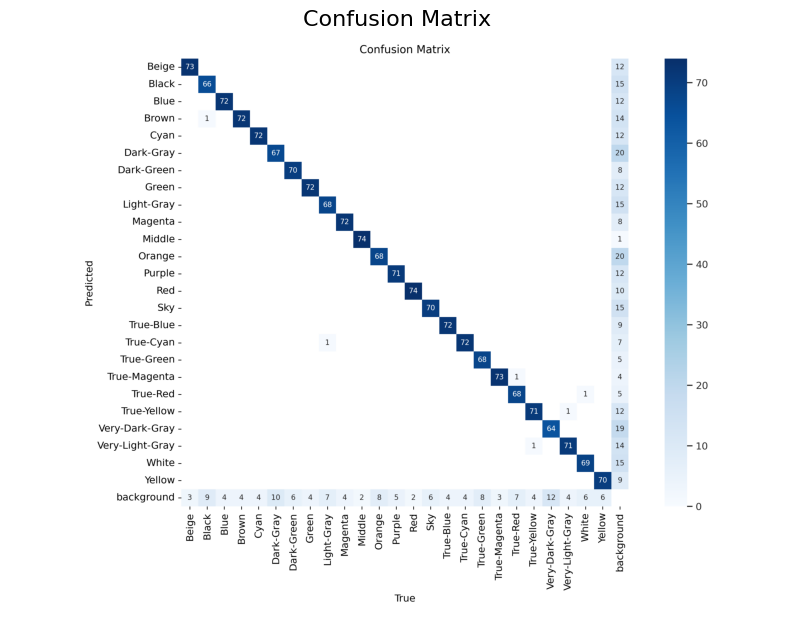

In [13]:
# Pastikan library ini diimpor
from PIL import Image
import matplotlib.pyplot as plt
import os

# Menampilkan confusion matrix dengan ukuran lebih besar
plt.figure(figsize=(10, 10))  # Atur ukuran gambar (lebar, tinggi) dalam satuan inci
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix", fontsize=16)  # Ukuran font judul
plt.axis("off")
plt.show()

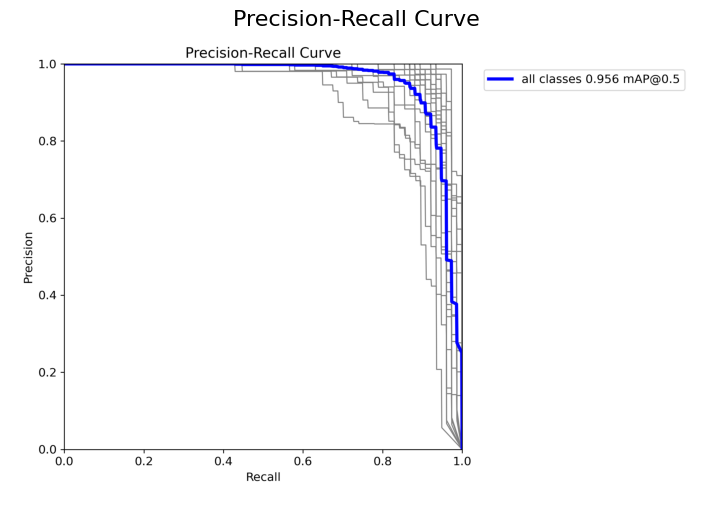

In [15]:
# Menampilkan Precision-Recall Curve dengan ukuran lebih besar
pr_curve_path = os.path.join(results.save_dir, "PR_curve.png")  # Menggunakan results.save_dir
if os.path.exists(pr_curve_path):  # Pastikan file ada
    pr_curve = Image.open(pr_curve_path)
    plt.figure(figsize=(10, 6))  # Atur ukuran (opsional)
    plt.imshow(pr_curve)
    plt.title("Precision-Recall Curve", fontsize=16)
    plt.axis("off")
    plt.show()
else:
    print(f"PR Curve tidak ditemukan di path: {pr_curve_path}")

Menampilkan 5 gambar acak dari dataset asli:


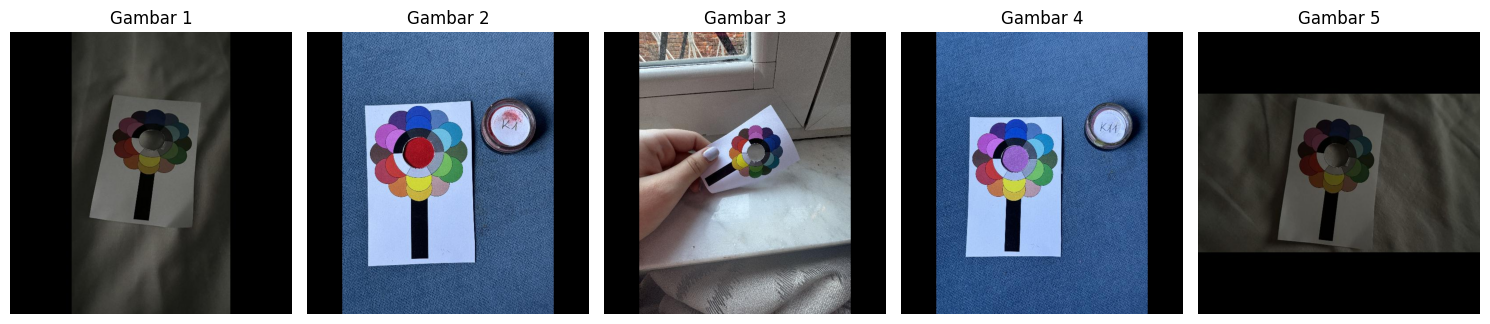

In [27]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Path folder gambar asli
images_folder = os.path.join(dataset_path, "test", "images")

if os.path.exists(images_folder):  # Pastikan folder ada
    # Ambil semua file gambar dari folder
    image_files = os.listdir(images_folder)

    if image_files:  # Pastikan ada gambar di folder
        # Pilih 5 gambar secara acak
        random_images = random.sample(image_files, min(len(image_files), 5))
        print(f"Menampilkan 5 gambar acak dari dataset asli:")

        # Tampilkan 5 gambar dalam grid
        plt.figure(figsize=(15, 10))  # Ukuran canvas besar untuk beberapa gambar
        for i, image_name in enumerate(random_images):
            image_path = os.path.join(images_folder, image_name)

            # Baca gambar asli
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Subplot untuk menampilkan beberapa gambar
            plt.subplot(1, 5, i + 1)  # 1 baris x 5 kolom
            plt.imshow(img)
            plt.title(f"Gambar {i + 1}", fontsize=12)
            plt.axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print(f"Tidak ada gambar di folder: {images_folder}")
else:
    print(f"Folder tidak ditemukan: {images_folder}")


image 1/46 /content/color-palette-6/test/images/IMG_3710_jpg.rf.ab79de1c50b5e0e589716238dc44747d.jpg: 640x640 1 Beige, 1 Black, 1 Blue, 1 Brown, 1 Cyan, 1 Dark-Gray, 1 Dark-Green, 1 Green, 1 Light-Gray, 1 Magenta, 1 Middle, 1 Orange, 1 Purple, 1 Red, 1 Sky, 1 True-Blue, 1 True-Cyan, 1 True-Green, 1 True-Magenta, 1 True-Red, 1 True-Yellow, 1 Very-Dark-Gray, 1 Very-Light-Gray, 2 Whites, 1 Yellow, 17.3ms
image 2/46 /content/color-palette-6/test/images/IMG_3713_png.rf.675f8ce136de2e987ccfceb7d0397326.jpg: 640x640 1 Beige, 1 Black, 1 Blue, 1 Brown, 1 Cyan, 1 Dark-Gray, 1 Dark-Green, 1 Green, 1 Light-Gray, 1 Magenta, 1 Middle, 1 Orange, 1 Purple, 1 Red, 1 Sky, 1 True-Blue, 1 True-Cyan, 1 True-Green, 1 True-Magenta, 1 True-Red, 1 True-Yellow, 1 Very-Dark-Gray, 1 Very-Light-Gray, 1 White, 1 Yellow, 11.4ms
image 3/46 /content/color-palette-6/test/images/IMG_3716_jpg.rf.5096757290191f547da25dd185a8753f.jpg: 640x640 1 Beige, 1 Black, 1 Blue, 1 Brown, 1 Cyan, 2 Dark-Grays, 1 Dark-Green, 1 Green, 

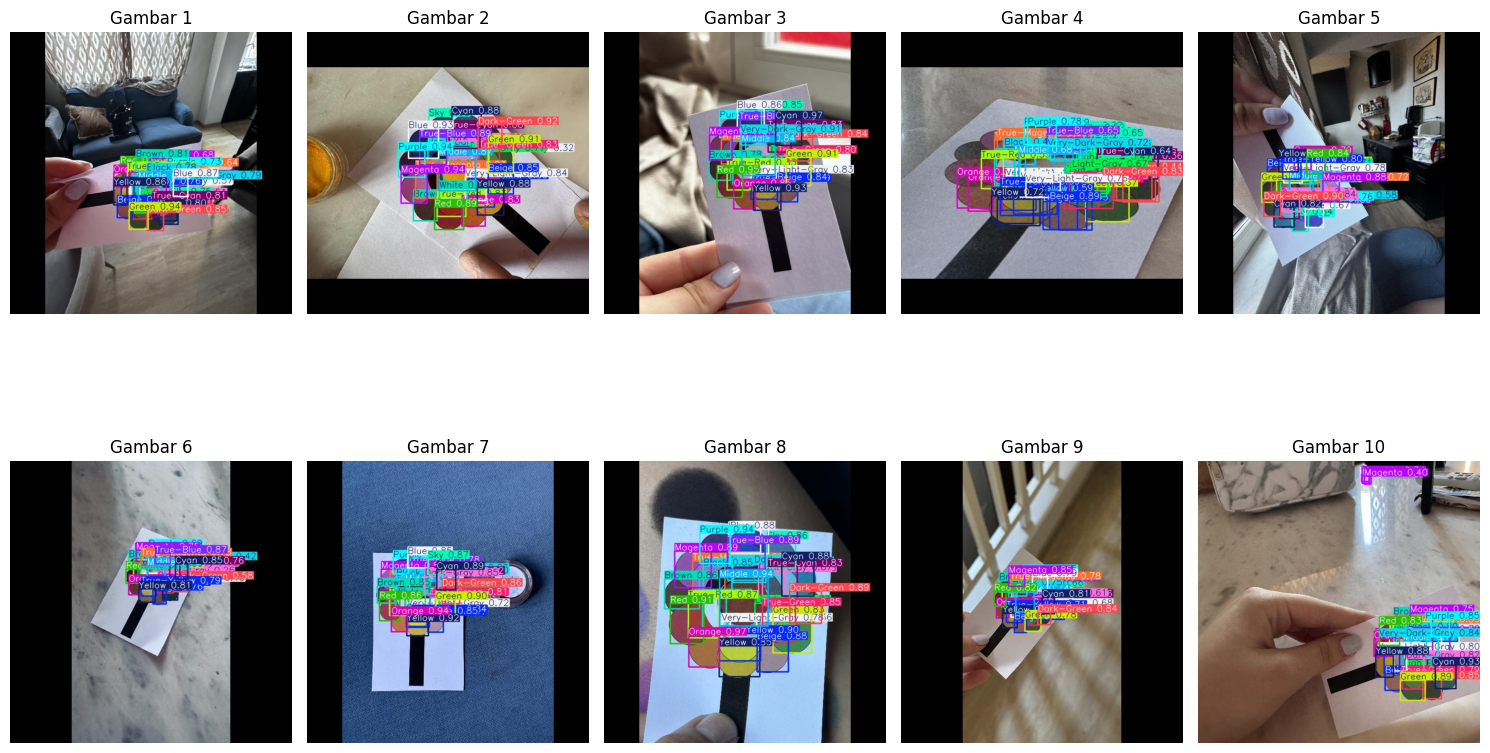

In [18]:
import glob

# Jalankan inferensi pada seluruh dataset test
test_folder = os.path.join(dataset_path, "test", "images")
if os.path.exists(test_folder):  # Pastikan folder test ada
    test_results = model.predict(source=test_folder, save=True)

    # Informasikan lokasi hasil deteksi
    print("Deteksi selesai. Hasil disimpan di folder:", test_results[0].save_dir)

    # Cari semua gambar hasil prediksi
    predicted_images_path = os.path.join(test_results[0].save_dir, "*.jpg")
    predicted_images = glob.glob(predicted_images_path)

    # Batasi jumlah gambar yang ditampilkan (maksimal 10)
    num_images_to_display = min(len(predicted_images), 10)
    print(f"Menampilkan {num_images_to_display} gambar hasil prediksi.")

    # Tampilkan gambar-gambar hasil prediksi
    plt.figure(figsize=(15, 10))  # Ukuran canvas besar untuk beberapa gambar
    for i, img_path in enumerate(predicted_images[:num_images_to_display]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Subplot untuk menampilkan beberapa gambar dalam satu grid
        plt.subplot(2, 5, i + 1)  # Maksimum 2 baris x 5 kolom
        plt.imshow(img)
        plt.title(f"Gambar {i+1}", fontsize=12)
        plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print(f"Folder test tidak ditemukan: {test_folder}")

Gambar acak yang dipilih: /content/color-palette-6/test/images/IMG_3882_png.rf.968c4c29bd1767d32af856ab97e433f0.jpg

image 1/1 /content/color-palette-6/test/images/IMG_3882_png.rf.968c4c29bd1767d32af856ab97e433f0.jpg: 640x640 2 Beiges, 1 Blue, 2 Browns, 1 Cyan, 1 Dark-Gray, 2 Dark-Greens, 2 Greens, 1 Light-Gray, 1 Magenta, 1 Middle, 1 Orange, 1 Purple, 1 Red, 1 Sky, 2 True-Blues, 2 True-Greens, 1 True-Magenta, 1 True-Red, 1 True-Yellow, 2 Very-Light-Grays, 3 Whites, 2 Yellows, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/color_detection_experiment16
Hasil prediksi ditemukan: runs/detect/color_detection_experiment16/IMG_3882_png.rf.968c4c29bd1767d32af856ab97e433f0.jpg


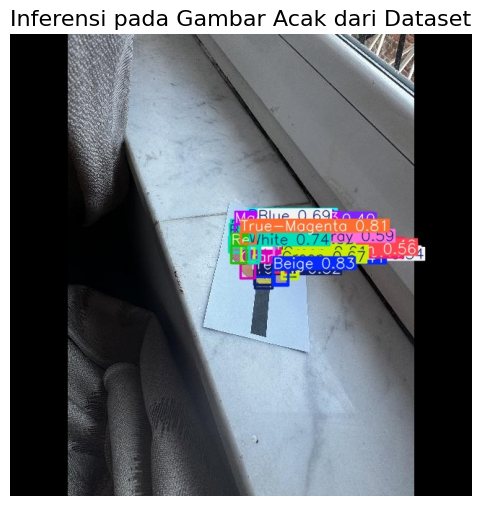

In [26]:
import random
import cv2

# Pilih gambar acak dari dataset test
test_images_path = os.path.join(dataset_path, "test", "images")
if os.path.exists(test_images_path):  # Pastikan folder test/images ada
    test_images = os.listdir(test_images_path)
    if test_images:  # Pastikan ada gambar di folder
        # Pilih gambar acak dari dataset
        random_image = random.choice(test_images)
        random_image_path = os.path.join(test_images_path, random_image)
        print("Gambar acak yang dipilih:", random_image_path)

        # Jalankan inferensi pada gambar acak
        results = model.predict(source=random_image_path, save=True)

        # Ambil path gambar hasil prediksi dari folder hasil
        prediction_folder = results[0].save_dir  # Folder hasil prediksi
        predicted_images_path = os.path.join(prediction_folder, "*.jpg")
        predicted_images = glob.glob(predicted_images_path)

        # Pastikan hasil prediksi ada
        if predicted_images:
            # Ambil hanya gambar hasil prediksi dari gambar acak
            result_image_path = predicted_images[0]  # Ambil gambar pertama (karena hanya satu gambar)
            print(f"Hasil prediksi ditemukan: {result_image_path}")

            # Tampilkan hasil inferensi
            result_image = cv2.imread(result_image_path)
            plt.figure(figsize=(10, 6))  # Atur ukuran gambar
            plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
            plt.title("Inferensi pada Gambar Acak dari Dataset", fontsize=16)
            plt.axis("off")
            plt.show()
        else:
            print("Tidak ada hasil prediksi ditemukan.")
    else:
        print(f"Tidak ada gambar di folder: {test_images_path}")
else:
    print(f"Folder test/images tidak ditemukan: {test_images_path}")